Test chip design
Author Gyum Lee

10mm square chip
7.5GHz 1/2 lambda resonator
7.3GHz 1/4 lambda resonator
7GHz 1/2 lanmda resonator and transmon qubit

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.coupled_line_tee_sym import CoupledLineTeeSym

from qiskit_metal.qlibrary.qubits.transmon_sqnl import TransmonPocket_sqnl

In [2]:
design = designs.DesignPlanar({}, True)

design.chips.main['material'] = 'silicon'
design.chips.main.size['size_x'] = '10mm'
design.chips.main.size['size_y'] = '10mm'
design.chips.main.size['size_z'] = '-500um' # chip extends in negative z direction by 500 um
design.chips.main.size['center_x'] = '5mm'
design.chips.main.size['center_y'] = '5mm'
gui = MetalGUI(design)

In [3]:
Launchpad_pos_y = 6.5   #unit in mm


coupler7_pos_x = 3
coupler7p3_pos_x = 5
coupler7p5_pos_x = 7
coupling_space = 3e-3
coupling_length = 100e-3
down_length = 100e-3

res_left_end_offset = 1
res_right_end_x_offset = 50e-3
res_right_end_y_offset = 2
q1_pos_x = 3
q1_pos_y = 3

otg_7_pos_x = coupler7_pos_x - res_left_end_offset
stg_7p3_pos_x = coupler7p3_pos_x - res_left_end_offset
otg_7p3_pos_x = coupler7p3_pos_x + res_right_end_x_offset
otg1_7p5_pos_x = coupler7p5_pos_x - res_left_end_offset
otg2_7p5_pos_x = coupler7p5_pos_x + res_right_end_x_offset

otg_7_pos_y = Launchpad_pos_y - res_left_end_offset
stg_7p3_pos_y = Launchpad_pos_y - res_left_end_offset
otg_7p3_pos_y = Launchpad_pos_y - res_right_end_y_offset
otg_7p3_pos_y = Launchpad_pos_y - res_right_end_y_offset
otg1_7p5_pos_y = Launchpad_pos_y - res_left_end_offset
otg2_7p5_pos_y = Launchpad_pos_y - res_right_end_y_offset
otg2_7p5_pos_y = Launchpad_pos_y - res_right_end_y_offset

otg_q1_drive_pos_x = q1_pos_x
otg_q1_drive_pos_y = q1_pos_y - 300e-3



In [4]:

Launchpad_left = LaunchpadWirebond(design,
                                   'launch_left',
                                   options=dict(pos_x = 0.26,
                                                pos_y = Launchpad_pos_y,
                                                orientation = 0
                                                ),
                                   )

Launchpad_right = LaunchpadWirebond(design,
                                   'launch_right',
                                   options=dict(pos_x = 10-0.26,
                                                pos_y = Launchpad_pos_y,
                                                orientation = 180
                                                ),
                                   )

Launchpad_q1_drive = LaunchpadWirebond(design,
                                   'launch_q1_drive',
                                   options=dict(pos_x = 3,
                                                pos_y = 0 + 0.26,
                                                orientation = 90
                                                ),
                                   )

gui.rebuild()
gui.autoscale()
# gui.highlight_components(['launch_left','launch_right'])

In [5]:
hlambda_7_coupler = CoupledLineTeeSym(design,
                                        'hlambda_7_coupler',
                                        options = dict(
                                            pos_x = coupler7_pos_x,
                                            pos_y = Launchpad_pos_y,
                                            coupling_space = coupling_space,
                                            coupling_length = coupling_length,
                                            down_length = down_length,
                                            filet = '25 um'
                                        )
                                        )

qlambda_7p3_coupler = CoupledLineTeeSym(design,
                                        'qlambda_7p3_coupler',
                                        options = dict(
                                            pos_x = coupler7p3_pos_x,
                                            pos_y = Launchpad_pos_y,
                                            coupling_space = coupling_space,
                                            coupling_length = coupling_length,
                                            down_length = down_length,
                                            filet = '25 um'
                                        )
                                        )

hlambda_7p5_coupler = CoupledLineTeeSym(design,
                                        'hlambda_7p5_coupler',
                                        options = dict(
                                            pos_x = coupler7p5_pos_x,
                                            pos_y = Launchpad_pos_y,
                                            coupling_space = coupling_space,
                                            coupling_length = coupling_length,
                                            down_length = down_length,
                                            filet = '25 um'
                                        )
                                        )
# display(CoupledLineTee.get_template_options(design))
gui.rebuild()
# gui.zoom_on_components(['hlambda_7p5_coupler'])
gui.autoscale()
# display(design.all_component_names_id())
# gui.highlight_components([])

In [32]:
# trans_line1 = RouteStraight(design,
#                            'trans_line1',
#                            options = dict(
#                                 hfss_wire_bonds = True,
#                                 pin_inputs = Dict(
#                                     start_pin = dict(
#                                         component = 'launch_left',
#                                         pin = 'tie'
#                                     ),
#                                     end_pin = dict(
#                                         component = 'hlambda_7_coupler',
#                                         pin = 'prime_start'
#                                     )
#                                 )
#                            )
#                         )
trans_line1_meander = RouteMeander(design,
                                   'trans_line1_meander',
                                   options = dict(
                                       hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = dict(
                                                component = 'launch_left',
                                                pin = 'tie'
                                            ),
                                            end_pin = dict(
                                                component = 'hlambda_7_coupler',
                                                pin = 'prime_start'
                                            )
                                        ),
                                    lead = dict(
                                        start_straight = 100e-3,
                                        end_straight = 100e-3
                                    ),
                                    fillet = 50e-3,
                                    total_length = 5
                                   )
                                   )
trans_line2 = RouteStraight(design,
                           'trans_line2',
                           options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'hlambda_7_coupler',
                                        pin = 'prime_end'
                                    ),
                                    end_pin = dict(
                                        component = 'qlambda_7p3_coupler',
                                        pin = 'prime_start'
                                    )
                                )
                           )
                        )
trans_line3 = RouteStraight(design,
                           'trans_line3',
                           options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'qlambda_7p3_coupler',
                                        pin = 'prime_end'
                                    ),
                                    end_pin = dict(
                                        component = 'hlambda_7p5_coupler',
                                        pin = 'prime_start'
                                    )
                                )
                           )
                        )
# trans_line4 = RouteStraight(design,
#                            'trans_line4',
#                            options = dict(
#                                 hfss_wire_bonds = True,
#                                 pin_inputs = Dict(
#                                     start_pin = dict(
#                                         component = 'hlambda_7p5_coupler',
#                                         pin = 'prime_end'
#                                     ),
#                                     end_pin = dict(
#                                         component = 'launch_right',
#                                         pin = 'tie'
#                                     )
#                                 )
#                            )
#                         )
trans_line4_meander = RouteMeander(design,
                                   'trans_line4_meander',
                                   options = dict(
                                       hfss_wire_bonds = True,
                                    pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'hlambda_7p5_coupler',
                                        pin = 'prime_end'
                                    ),
                                    end_pin = dict(
                                        component = 'launch_right',
                                        pin = 'tie'
                                    )
                                    ),
                                lead = dict(
                                    start_straight = 100e-3,
                                    end_straight = 100e-3
                                    ),
                                fillet = 50e-3,
                                total_length = 5
                                   )
                                   )


gui.rebuild()
gui.autoscale()
# gui.highlight_components(['launch_left', 'launch_right','hlambda_7p5_coupler','qlambda_7p3_coupler','hlambda_7_coupler'])

In [7]:
options_1 =  dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type = '1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing = '6um',
                       claw_width = '40um',
                       claw_gap = '125um',
                       claw_cpw_length = '100um',
                       claw_cpw_width = '10um',
                       connector_location = 1  # 0 => 'west' arm, 1 => 'north' arm, 2 => 'east' arm
                       )
    )
    )

q1 = TransmonPocket_sqnl(design,
                          'q1', 
                          options = dict(pos_x = q1_pos_x,
                                        pos_y = q1_pos_y, 
                                        gds_cell_name = 'FakeJunction_01',
                                        hfss_inductance = '14nH',
                                        **options_1
                          )
        )
q1_drive_otg = OpenToGround(design,
                             'q1_drive_otg',
                             options = dict(pos_x = otg_q1_drive_pos_x,
                                            pos_y = otg_q1_drive_pos_y,
                                            orientation = 90
                             )
                             )


q1_drive = RouteStraight(design,
                           'q1_drive',
                           options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'launch_q1_drive',
                                        pin = 'tie'
                                    ),
                                    end_pin = dict(
                                        component = 'q1_drive_otg',
                                        pin = 'open'
                                    )
                                )
                           )
                        )

gui.rebuild()
gui.autoscale()

In [8]:
hlambda_7_otg = OpenToGround(design,
                             'hlambda_7_otg',
                             options = dict(pos_x = otg_7_pos_x + 300e-3,
                                            pos_y = otg_7_pos_y,
                                            orientation = 180
                             )
                             )

hlambda_7_trans_left = RouteMeander(design,
                            'hlambda_7_trans_left',
                            options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'hlambda_7_coupler',
                                        pin = 'second_start'
                                    ),
                                    end_pin = dict(
                                        component = 'hlambda_7_otg',
                                        pin = 'open'
                                    )
                                ),
                                lead = dict(
                                    start_straight = 600e-3,
                                    end_straight = 00e-3
                                ),
                                fillet = 50e-3,
                                total_length = 1.99831
                            )
                         )

hlambda_7_trans_right = RouteMeander(design,
                            'hlambda_7_trans_right',
                            options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'hlambda_7_coupler',
                                        pin = 'second_end'
                                    ),
                                    end_pin = dict(
                                        component = 'q1',
                                        pin = 'readout'
                                    )
                                ),
                                lead = dict(
                                    start_straight = 1000e-3,
                                    end_straight = 00e-3
                                ),
                                fillet = 50e-3,
                                total_length = 6.29573
                            )
                         )

qlambda_7p3_stg = ShortToGround(design,
                             'qlambda_7p3_stg',
                             options = dict(pos_x = stg_7p3_pos_x + 300e-3,
                                            pos_y = stg_7p3_pos_y,
                                            orientation = 180
                             )
                             )

qlambda_7p3_trans_left = RouteMeander(design,
                            'qlambda_7p3_trans_left',
                            options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'qlambda_7p3_coupler',
                                        pin = 'second_start'
                                    ),
                                    end_pin = dict(
                                        component = 'qlambda_7p3_stg',
                                        pin = 'short'
                                    )
                                ),
                                lead = dict(
                                    start_straight = 500e-3,
                                    end_straight = 00e-3
                                ),
                                fillet = 50e-3,
                                total_length = 1.91006
                            )
                         )

qlambda_7p3_otg = OpenToGround(design,
                             'qlambda_7p3_otg',
                             options = dict(pos_x = otg_7p3_pos_x + 00e-3,
                                            pos_y = otg_7p3_pos_y + 300e-3,
                                            orientation = 270
                             )
                             )

qlambda_7p3_trans_right = RouteMeander(design,
                            'qlambda_7p3_trans_right',
                            options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'qlambda_7p3_coupler',
                                        pin = 'second_end'
                                    ),
                                    end_pin = dict(
                                        component = 'qlambda_7p3_otg',
                                        pin = 'open'
                                    )
                                ),
                                lead = dict(
                                    start_straight = 1000e-3,
                                    end_straight = 00e-3
                                ),
                                fillet = 50e-3,
                                total_length = 1.91006
                            )
                         )

hlambda_7p5_otg1 = OpenToGround(design,
                             'hlambda_7p5_otg1',
                             options = dict(pos_x = otg1_7p5_pos_x + 300e-3,
                                            pos_y = otg1_7p5_pos_y,
                                            orientation = 180
                             )
                             )

hlambda_7p5_trans_left = RouteMeander(design,
                            'hlambda_7p5_trans_left',
                            options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'hlambda_7p5_coupler',
                                        pin = 'second_start'
                                    ),
                                    end_pin = dict(
                                        component = 'hlambda_7p5_otg1',
                                        pin = 'open'
                                    )
                                ),
                                lead = dict(
                                    start_straight = 600e-3,
                                    end_straight = 00e-3
                                ),
                                fillet = 50e-3,
                                total_length = 1.85487
                            )
                         )

hlambda_7p5_otg2 = OpenToGround(design,
                             'hlambda_7p5_otg2',
                             options = dict(pos_x = otg2_7p5_pos_x + 00e-3,
                                            pos_y = otg2_7p5_pos_y - 1,
                                            orientation = 270
                             )
                             )

hlambda_7p5_trans_right = RouteMeander(design,
                            'hlambda_7p5_trans_right',
                            options = dict(
                                hfss_wire_bonds = True,
                                pin_inputs = Dict(
                                    start_pin = dict(
                                        component = 'hlambda_7p5_coupler',
                                        pin = 'second_end'
                                    ),
                                    end_pin = dict(
                                        component = 'hlambda_7p5_otg2',
                                        pin = 'open'
                                    )
                                ),
                                lead = dict(
                                    start_straight = 1000e-3,
                                    end_straight = 00e-3
                                ),
                                fillet = 50e-3,
                                total_length = 5.86516
                            )
                         )



gui.rebuild()
gui.autoscale()

In [9]:
# design.delete_all_components()

# Simulation

In [10]:
from qiskit_metal.analyses.quantization import EPRanalysis

eig_qb = EPRanalysis(design, "hfss")

In [27]:
eig_qb.sim.setup_update(name = 'Setup',
                        min_freq_ghz = 2,
                        n_modes = 5,
                        max_delta_f = 1,
                        max_passes = 15,
                        min_passes = 1,
                        min_converged = 1,
                        pct_refinement = 30,
                        basis_order = 0)
eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 2,
 'n_modes': 5,
 'max_delta_f': 1,
 'max_passes': 15,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 0,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'},
 'run': {'name': 'Qbit',
  'components': [],
  'open_terminations': [],
  'port_list': None,
  'jj_to_port': None,
  'ignored_jjs': None,
  'box_plus_buffer': False}}

In [28]:
# eig_qb.sim.run(name="Qbit", components=[], open_terminations=[], box_plus_buffer = False) # this line redraw modeling
eig_qb.sim.run_sim(name="Qbit")  # this line does not update modeling. It updates setup info and run simulation.
# eig_qb.sim.start() # this line for when restarting kernel. it loads ansys module without any update
eig_qb.sim.plot_convergences()
print(eig_qb.get_frequencies())


"""
Known issue
    #1 Simulation fails due to modeling overlap:
        Wirebonds are placed without any concern of others.
        Sometimes they got overlap and causes simulation error.
        Solution : Move one of them to where give no overlap
"""

INFO 01:51PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:51PM [analyze]: Analyzing setup Setup
02:03PM 00s INFO [get_f_convergence]: Saved convergences to c:\Users\Gyum\qiskit-metal\hfss_eig_f_convergence.csv
INFO 02:03PM [__del__]: Disconnected from Ansys HFSS


INFO 02:03PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


Design "Qbit_hfss" info:
	# eigenmodes    5
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    5
	# variations    1


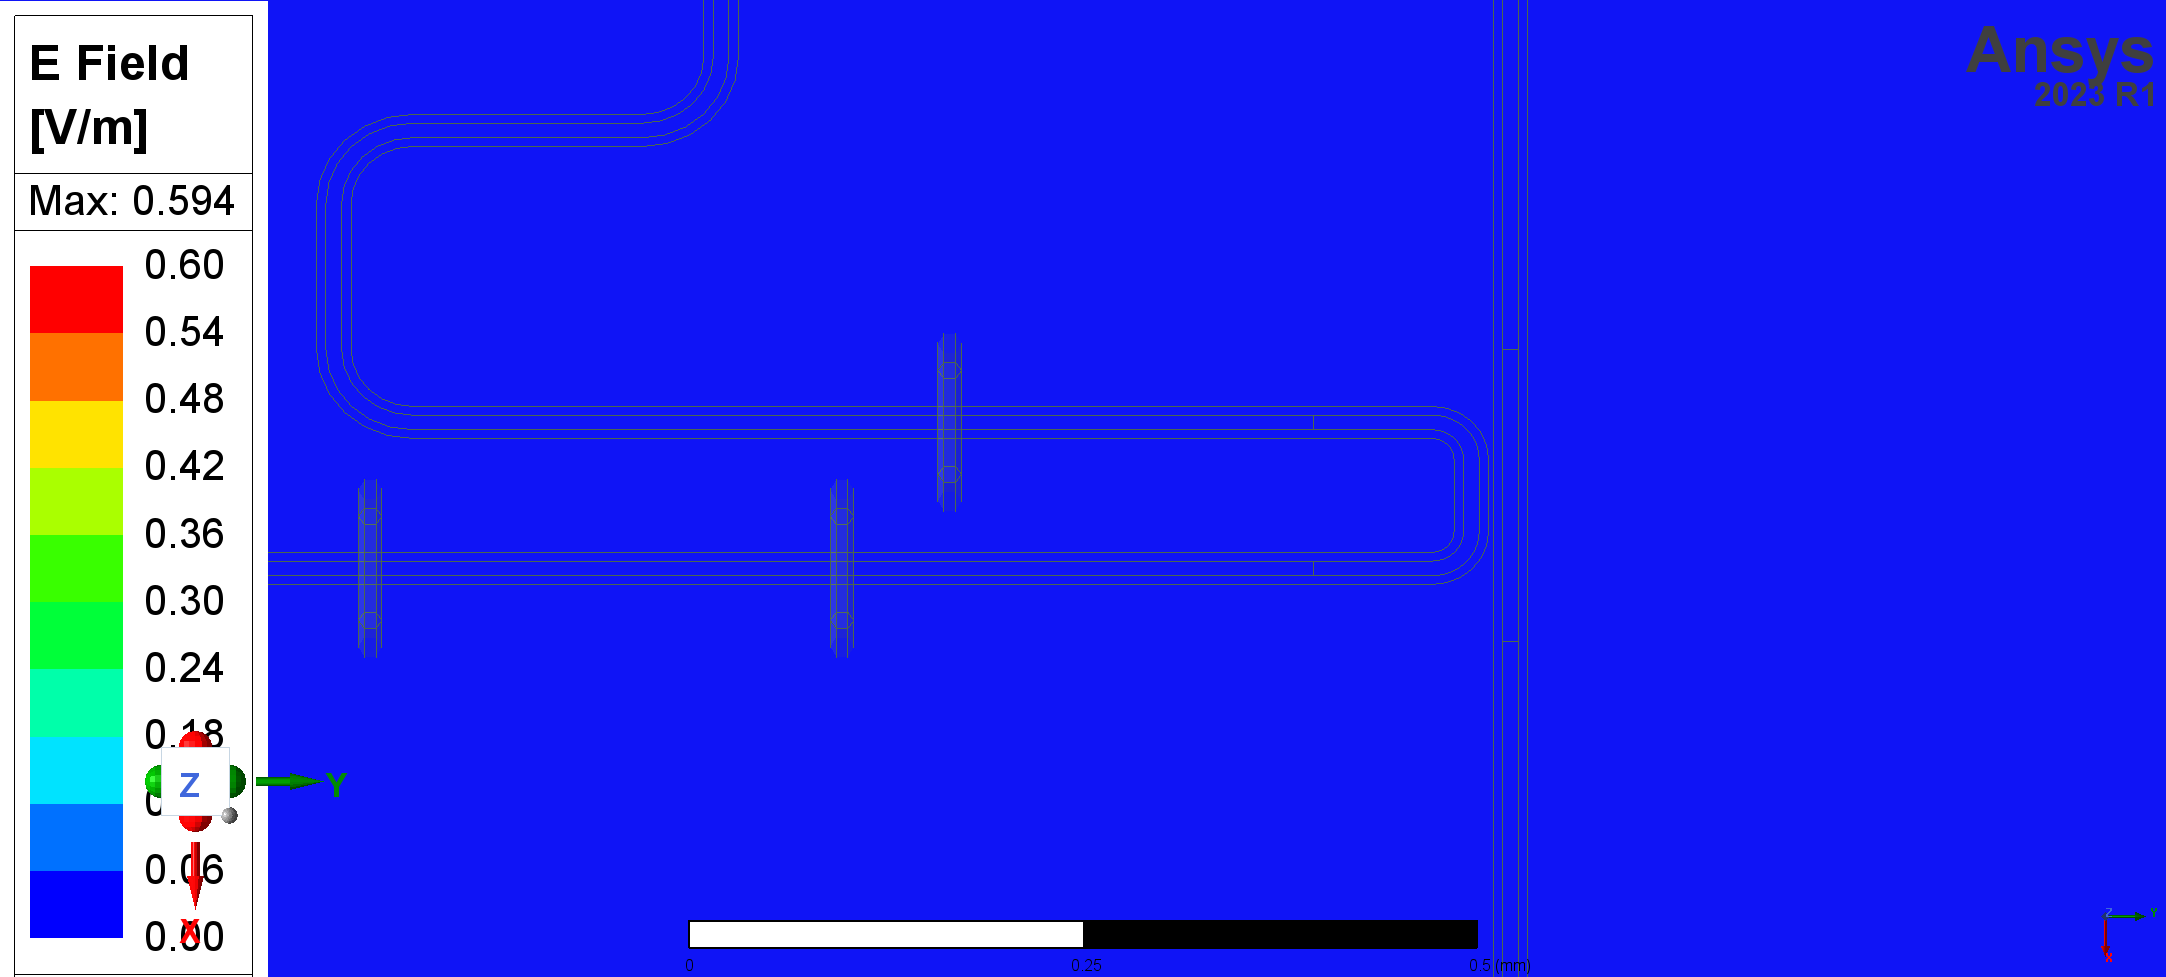

WindowsPath('c:/Users/Gyum/qiskit-metal/ansys.png')

In [29]:
eig_qb.sim.plot_fields('main')
eig_qb.sim.save_screenshot()

In [31]:
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_q1_rect_jj_'
eig_qb.run_epr()

Design "Qbit_hfss" info:
	# eigenmodes    5
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    5
	# variations    1

        energy_elec_all       = 4.9596668764302e-24
        energy_elec_substrate = 4.53601527540115e-24
        EPR of substrate = 91.5%

        energy_mag    = 4.95719052980441e-24
        energy_mag % of energy_elec_all  = 100.0%
        

Variation 0  [1/1]

  Mode 0 at 4.00 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               -0.0%   3.91e-24  3.91e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.75%
	jj              1.50895e-10  (+)        1.90704e-12
		(U_tot_cap-U_tot_ind)/mean=-0.00%
Calculating Qdielectric_main for mode 0 (0/4)
p_dielectric_main_0 = 0.8958423544617162

  Mode 1 at 4.85 GHz   [2/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)

WARNING 02:42PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 02:42PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 30.6% is > 15%.                     
Is the simulation converged? Proceed with caution



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\Qbit_hfss\2024-03-05 14-40-25.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


ERROR 06:03PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 30.6% is > 15%.                     
Is the simulation converged? Proceed with caution
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Pm_norm=
modes
0       345.231147
1         0.734385
2         0.872694
3       968.791963
4    142610.240371
dtype: float64

Pm_norm idx =
      jj
0  False
1   True
2  False
3  False
4  False
*** P (participation matrix, not normlz.)
             jj
0  1.508945e-10
1  1.354098e+00
2  6.982784e-04
3  7.313763e-11
4  2.154284e-12

*** S (sign-bit matrix)
   s_jj
0     1
1    -1
2     1
3     1
4    -1
*** P (participation matrix, normalized.)
   1.5e-10
      0.99
    0.0007
   7.3e-11
   2.2e-12

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  2.79e-18 4.45e-08 4.01e-11 4.88e-18 1.48e-19
  4.45e-08      178     0.32  3.9e-08 1.18e-09
  4.01e-11     0.32 0.000144 3.51e-11 1.07e-12
  4.88e-18  3.9e-08 3.51e-11 2.14e-18  1.3e-19
  1.48e-19 1.18e-09 1.07e-12  1.3e-19 1.97e-21

*** Chi matrix ND (MHz) 
 -2.48e-11 1.13e-07 4.77e-11       -0-2.86e-11
  1.13e-07      193    0.242 3.41e-08 1.02e-09
  4.77e-11    0.242 8.89e-05 2.86e-11 3.81e-12
        -0 3

  fig.tight_layout()



#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
0,4000.82
1,4662.32
2,6216.97
3,7229.94
4,7455.04


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1         2         3         4
Lj                                                    
10 0 -2.48e-11  1.13e-07  4.77e-11 -0.00e+00 -2.86e-11
   1  1.13e-07  1.93e+02  2.42e-01  3.41e-08  1.02e-09
   2  4.77e-11  2.42e-01  8.89e-05  2.86e-11  3.81e-12
   3 -0.00e+00  3.41e-08  2.86e-11 -1.53e-11 -5.15e-11
   4 -2.86e-11  1.02e-09  3.81e-12 -5.15e-11 -5.15e-11

In [19]:
eig_qb.sim.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


해야할 일 리스트

1) 칩 양 엽에 런치 패드 만들기  V
2) 런치 패드 이어주는 트랜스 미션 라인 만들기   v
    * 커플러를 놓고 그것들끼리 이어줌   v
3) 레조네이터 만들기
    * (유의)커플러의 가운데가 노드에서 electrical length로 45도 떨어진 위치에 두기  V
    * 하프람다 레조네이터의 OTG 배치하기    V
    * 큐빗 커플 레조네이터의 큐빗 커플러 만들기 - 혁형 q링칩 디자인 참고하기 V
    * 쿼터람다 레조네이터의 STG 배치하기    V
4) 큐빗 배치하기 V
5) 컨트롤 라인 배치하기 V
6) Simulation setup
    * Eigenmode and EPR study - 전에 써놨던 EPR 코드 참고해보기
    * HFSS Terminal analysis
7) gds output
